In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df_agriculture=pd.read_excel('C:\\Users\\jlvly\\Downloads\\train_agriculture.xlsx')
df_agriculture

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [40]:
df_agriculture.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [41]:
df_agriculture.shape

(4599, 10)

In [42]:
df_agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [43]:
df_agriculture.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [44]:
df_agriculture.drop(["ID","Number_Weeks_Used"],axis=1,inplace=True)

In [45]:
#explaining the feautures ad targets

In [46]:
description=pd.DataFrame({'Variable':['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category ','Number_Doses_Week','Number_Weeks_Used ','Number_Weeks_Quit','Season','Crop_Damage'],'Defination':['estimated insect count per square metre','category of crop(0,1)','category of soil(0,1)','type of pesticide used(1-never,2-previously used,3-currently using)','number of doses per week','number of weeks used','number of weeks quit','season category(1,2,3)','crop damamge category(0-alive,1-damage due to other causes,2-damage due to pesticides)']})
description

,Variable,Defination
0,Estimated_Insects_Count,estimated insect count per square metre
1,Crop_Type,"category of crop(0,1)"
2,Soil_Type,"category of soil(0,1)"
3,Pesticide_Use_Category,"type of pesticide used(1-never,2-previously us..."
4,Number_Doses_Week,number of doses per week
5,Number_Weeks_Used,number of weeks used
6,Number_Weeks_Quit,number of weeks quit
7,Season,"season category(1,2,3)"
8,Crop_Damage,"crop damamge category(0-alive,1-damage due to ..."


In [47]:
df_agriculture.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [48]:
df_agriculture.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

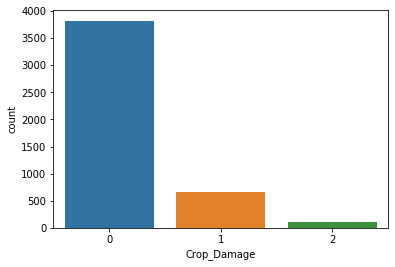

In [49]:
sns.countplot(x='Crop_Damage',data=df_agriculture)

In [50]:
# Most of the crops are alive 
#Damage is mainly caused by other causes and not by pesticides

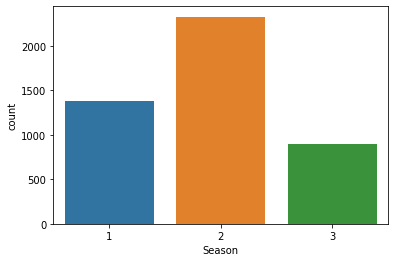

In [51]:
sns.countplot(x='Season',data=df_agriculture)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

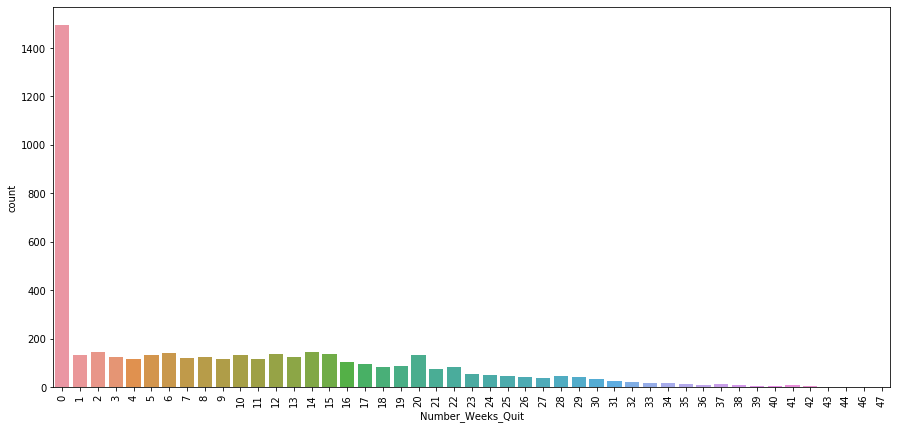

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='Number_Weeks_Quit',data=df_agriculture)
plt.xticks(rotation=90)

In [53]:
# above graph indicates that pesticides was used almost everyday

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

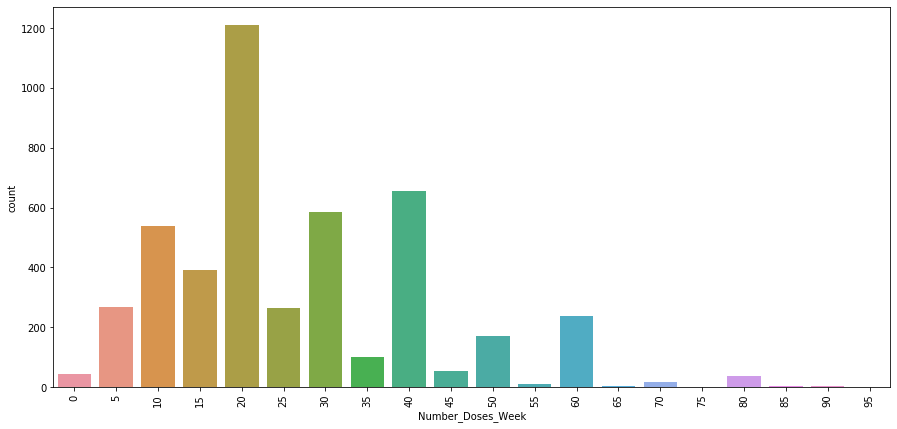

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(x='Number_Doses_Week',data=df_agriculture)
plt.xticks(rotation=90)

In [55]:
#maximum 20 doses per week were given

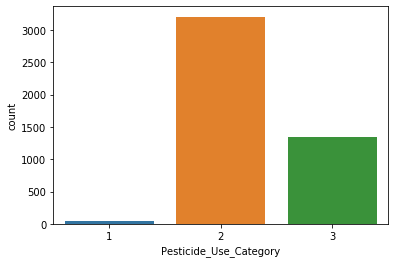

In [57]:
sns.countplot(x='Pesticide_Use_Category',data=df_agriculture)

In [58]:
#most of the pesticies are previosly used

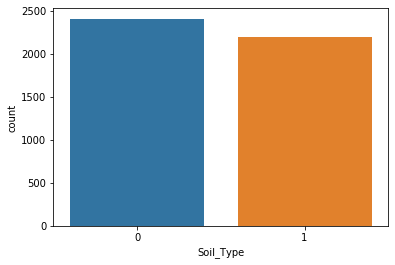

In [59]:
sns.countplot(x='Soil_Type',data=df_agriculture)

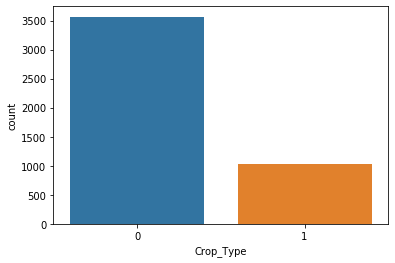

In [60]:
sns.countplot(x='Crop_Type',data=df_agriculture)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text xticklabel objects>)

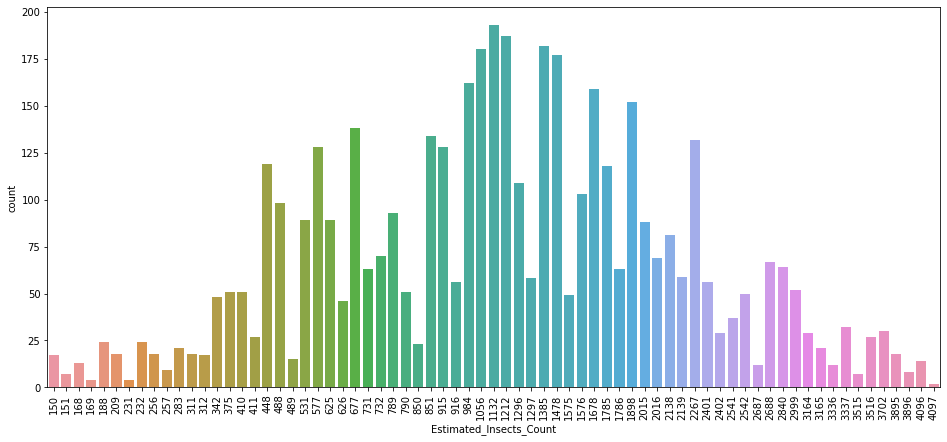

In [64]:
plt.figure(figsize=(16,7))

sns.countplot(x='Estimated_Insects_Count',data=df_agriculture)
plt.xticks(rotation=90)

In [65]:
#Bivariate analysis

In [68]:
df_agriculture.dtypes


Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object

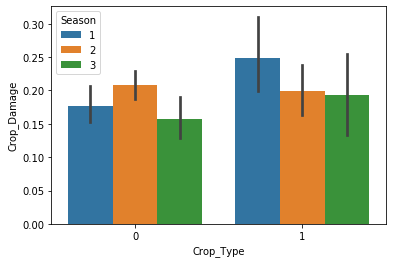

In [72]:
sns.barplot(x='Crop_Type',y='Crop_Damage',hue='Season',data=df_agriculture)

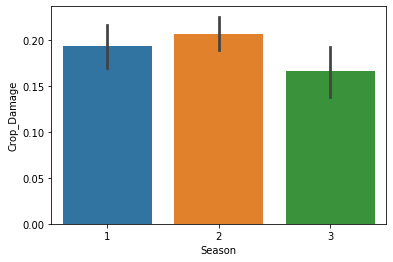

In [73]:
sns.barplot(x='Season',y='Crop_Damage',data=df_agriculture)

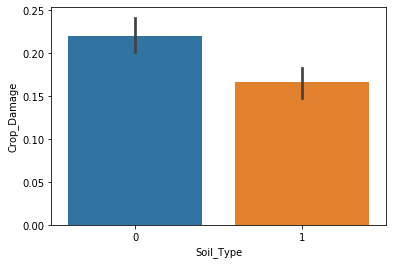

In [74]:
sns.barplot(x='Soil_Type',y='Crop_Damage',data=df_agriculture)

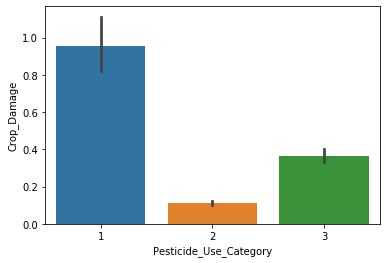

In [75]:
sns.barplot(x='Pesticide_Use_Category',y='Crop_Damage',data=df_agriculture)

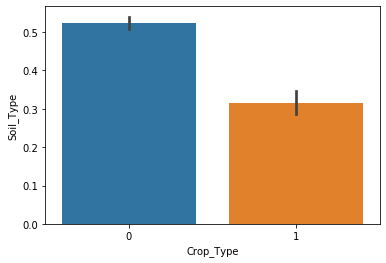

In [76]:
sns.barplot(x='Crop_Type',y='Soil_Type',data=df_agriculture)

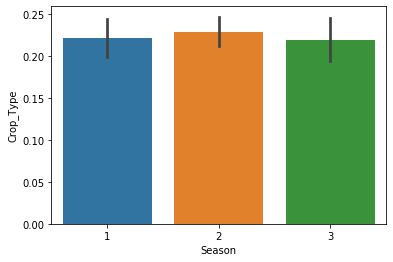

In [78]:
sns.barplot(x='Season',y='Crop_Type',data=df_agriculture)

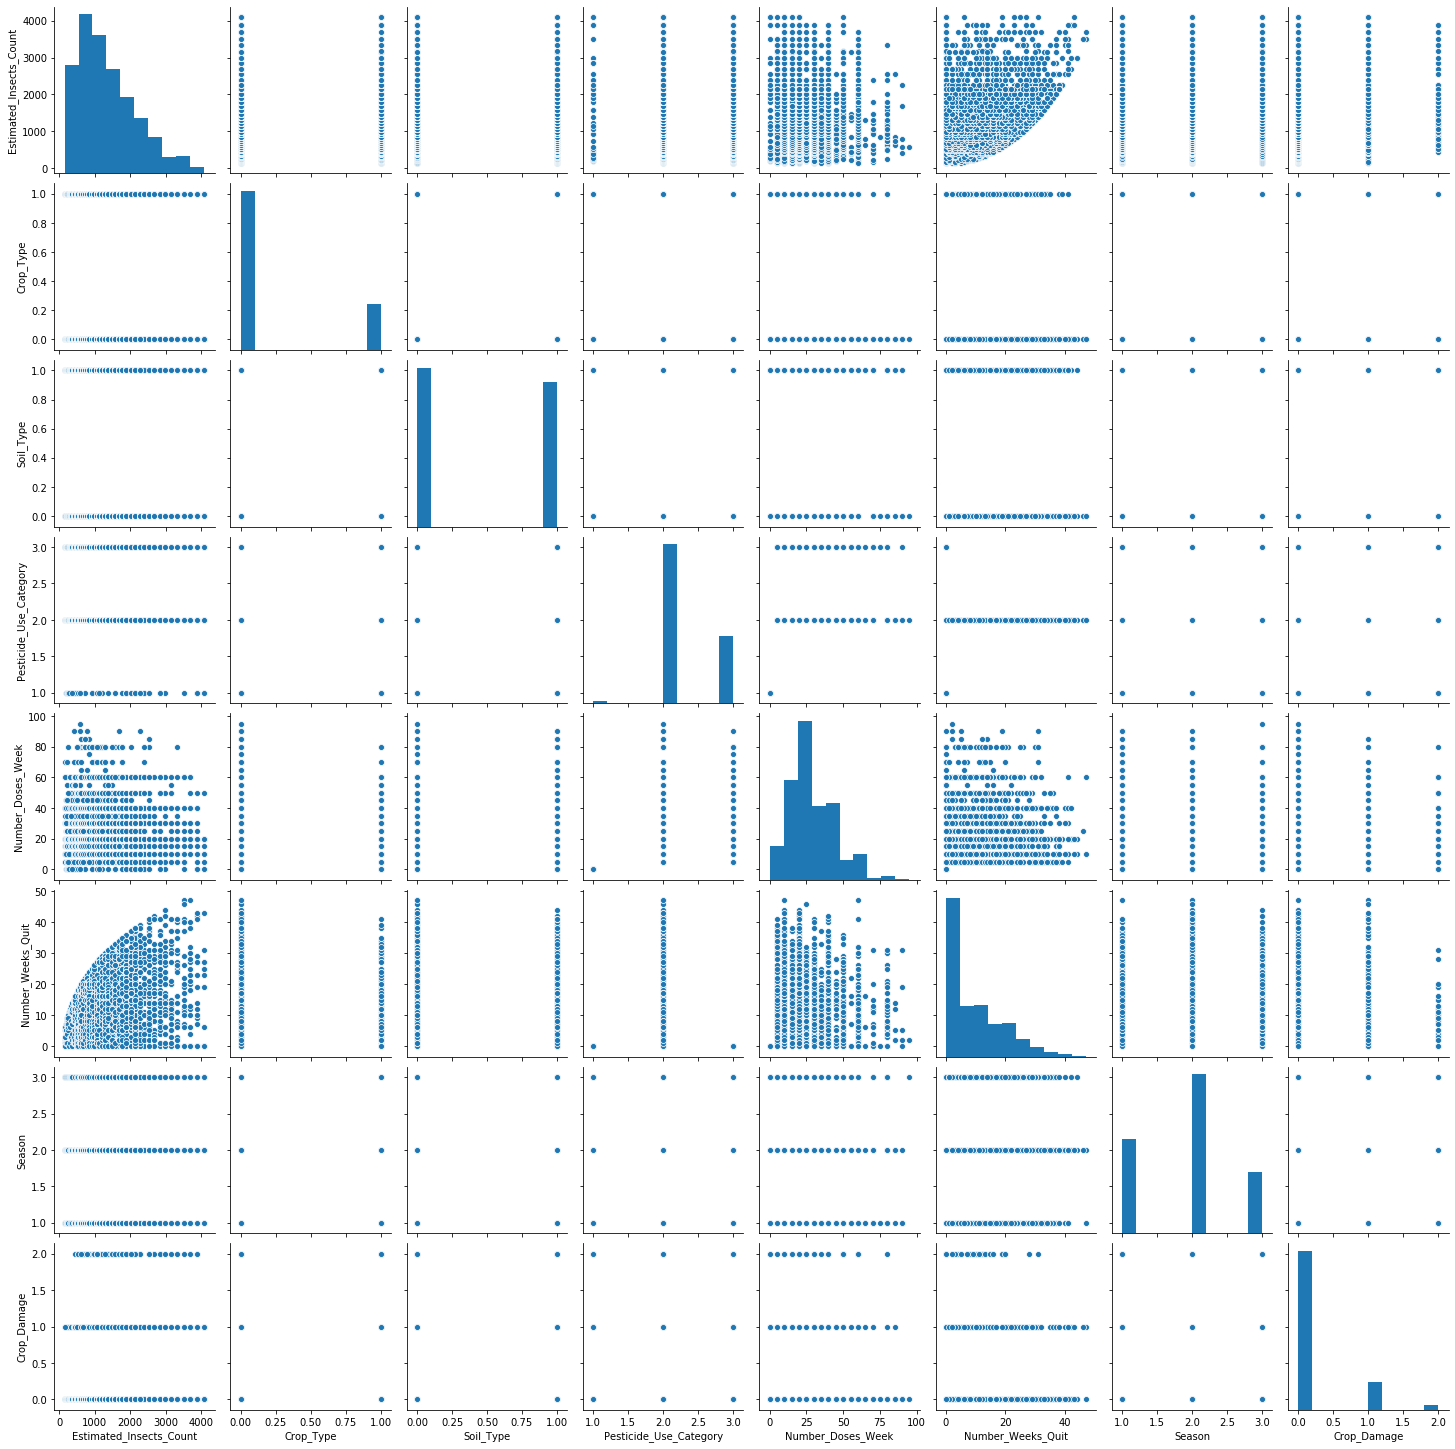

In [79]:
sns.pairplot(data=df_agriculture)

In [80]:
df_agriculture.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,-0.032381,-0.003768,-0.018363
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,-0.152918,-0.016196,1.000000


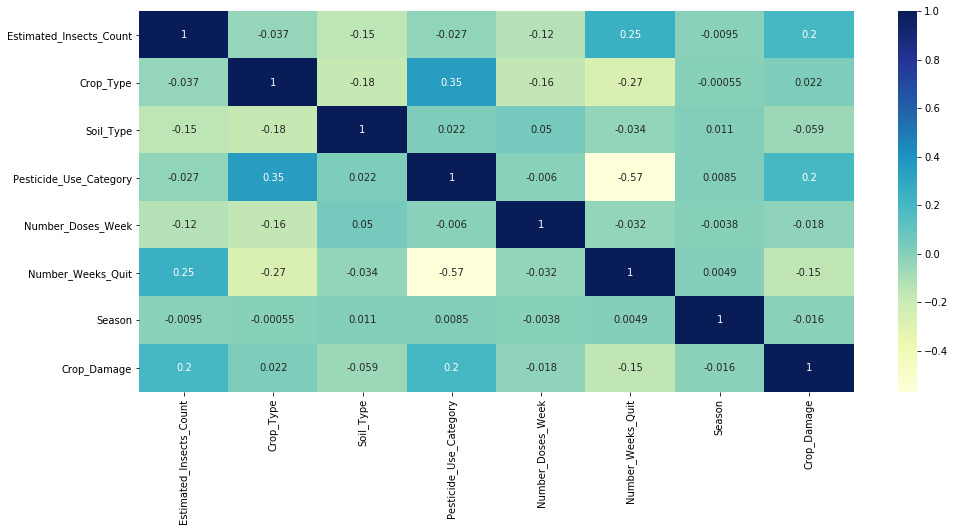

In [81]:
plt.figure(figsize=(16,7))
sns.heatmap(df_agriculture.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [82]:
#applying models

In [83]:
X=df_agriculture.drop('Crop_Damage',axis=1)
y=df_agriculture["Crop_Damage"]

In [84]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
0,188,1,0,1,0,0,1
1,209,1,0,1,0,0,2
2,257,1,0,1,0,0,2
3,257,1,1,1,0,0,2
4,342,1,0,1,0,0,2
...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,1,1
4595,2139,0,1,2,30,2,1
4596,2267,0,1,2,10,27,2
4597,2267,0,1,2,10,24,2


In [85]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4599, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [89]:
X_train

array([[-0.83229128, -0.54635836,  1.0565845 , ..., -0.09454291,
         0.49169061, -1.30062819],
       [-1.31232469,  1.83030052,  1.0565845 , ..., -0.09454291,
        -0.93761527, -1.30062819],
       [-0.4582551 , -0.54635836,  1.0565845 , ...,  0.23129609,
         0.79797044,  0.14656232],
       ...,
       [-0.4582551 ,  1.83030052,  1.0565845 , ...,  1.2088131 ,
        -0.93761527,  0.14656232],
       [ 0.94894943, -0.54635836, -0.94644583, ..., -1.39789892,
         1.30843682,  1.59375283],
       [-0.62029684, -0.54635836, -0.94644583, ..., -1.07205992,
         0.0833175 ,  0.14656232]])

In [90]:
y_train

1539    0
411     0
1736    1
4567    1
4471    0
       ..
4426    0
466     2
3092    0
3772    0
860     0
Name: Crop_Damage, Length: 3219, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [92]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acc_score=accuracy_score(pred,y_test)
acc_score

0.8304347826086956

In [93]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [94]:
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [95]:
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [96]:
model=[]
score=[]
cvs=[]


for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(criterion='gini'),SVC(C=1,kernel='rbf')]:
    k=i
    model.append(i)
    print("\n")
    print("model calculation for ",i,"are:")
    k.fit(X_train,y_train)
    k.score(X_train,y_train)
    pred=k.predict(X_test)
    print(pred)
    AS=accuracy_score(pred,y_test)
    print("accuracy score is",AS)
    score.append(AS)
    cv_score=cross_val_score(k,X,y,cv=5,scoring='accuracy').mean()
    print('cv score is',cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(pred,y_test)
    print(cm)
    print("")
    print(classification_report(pred,y_test))
    print("\n")



model calculation for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 ... 0 0 0]
accuracy score is 0.8304347826086956
cv score is 0.8264848370156598

[[1137  189   32]
 [  10    9    3]
 [   0    0    0]]

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1358
           1       0.05      0.41      0.08        22
           2       0.00      0.00      0.00         0

    accuracy                           0.83      1380
   macro avg       0.35      0.42      0.33      1380
weighted avg       0.98      0.83      0.89      1380





model calculation for  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                    

In [97]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC'],'Accuracy score':[0.83,0.83,0.75,0.83],'cross _val_score':[0.82,0.82,0.71,0.83]})

result

,Model,Accuracy score,cross _val_score
0,LogisticRegression,0.83,0.82
1,KNeighborsClassifier,0.83,0.82
2,DecisionTreeClassifier,0.75,0.71
3,SVC,0.83,0.83


In [98]:
#Saving Svc model

In [100]:
from sklearn.svm import SVC
sv=SVC(C=1,kernel='rbf')
sv.fit(X_train,y_train)
sv.score(X_train,y_train)
predct=k.predict(X_test)
predct


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
from sklearn.externals import joblib 
  

joblib.dump(sv, 'agr.pkl') 
  
sv_from_joblib = joblib.load('agr.pkl')  
  
sv_from_joblib.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)